In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')


In [2]:
df = pd.read_csv('titanic_train.csv')
df.sample(3)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
419,420,0,3,"Van Impe, Miss. Catharina",female,10.0,0,2,345773,24.15,NaN,S
319,320,1,1,"Spedden, Mrs. Frederic Oakley (Margaretta Corn...",female,40.0,1,1,16966,134.50,E34,C
605,606,0,3,"Lindell, Mr. Edvard Bengtsson",male,36.0,1,0,349910,15.55,NaN,S


In [3]:
df.info() 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [4]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [5]:
df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [6]:
df.describe(include = 'all')

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
count,891.000000,891.000000,891.000000,891,891,714.000000,891.000000,891.000000,891,891.000000,204,889
unique,NaN,NaN,NaN,891,2,NaN,NaN,NaN,681,NaN,147,3
top,NaN,NaN,NaN,"Braund, Mr. Owen Harris",male,NaN,NaN,NaN,347082,NaN,B96 B98,S
freq,NaN,NaN,NaN,1,577,NaN,NaN,NaN,7,NaN,4,644
mean,446.000000,0.383838,2.308642,NaN,NaN,29.699118,0.523008,0.381594,NaN,32.204208,NaN,NaN
std,257.353842,0.486592,0.836071,NaN,NaN,14.526497,1.102743,0.806057,NaN,49.693429,NaN,NaN
min,1.000000,0.000000,1.000000,NaN,NaN,0.420000,0.000000,0.000000,NaN,0.000000,NaN,NaN
25%,223.500000,0.000000,2.000000,NaN,NaN,20.125000,0.000000,0.000000,NaN,7.910400,NaN,NaN
50%,446.000000,0.000000,3.000000,NaN,NaN,28.000000,0.000000,0.000000,NaN,14.454200,NaN,NaN
75%,668.500000,1.000000,3.000000,NaN,NaN,38.000000,1.000000,0.000000,NaN,31.000000,NaN,NaN


EDA

In [7]:
target_cols = 'Survived'
cat_cols = ['Pclass','Sex','Embarked']
num_cols = ['Age','SibSp','Parch','Fare']
drop_cols = ['PassengerId']

In [8]:
df.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [9]:
df['PassengerId'].nunique()

891

# Univariate Analysis

In [10]:
def cat_anaylze(col):
    print(col)
    print(df[col].value_counts())
    sns.countplot(data=df,x=col)
    plt.show()

Pclass
3    491
1    216
2    184
Name: Pclass, dtype: int64


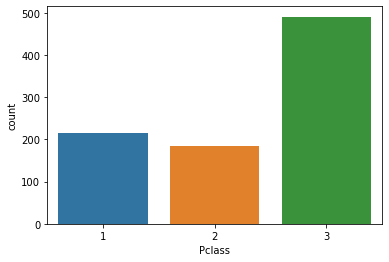

Sex
male      577
female    314
Name: Sex, dtype: int64


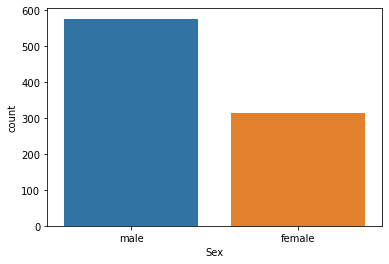

Embarked
S    644
C    168
Q     77
Name: Embarked, dtype: int64


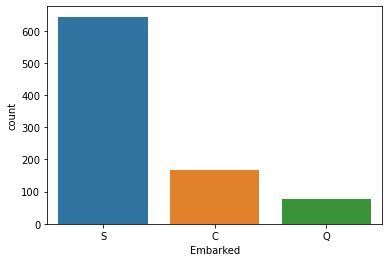

In [11]:
for col in cat_cols:
    cat_anaylze(col)

In [12]:
def num_anaylze(col):
    print(col)
    sns.distplot(df[col])
    plt.show()

    for col in num_cols:
        num_anaylze(col)

# Bivariate Analysis

In [13]:
def cat_bivariate (col):
    print(col)
    print(df.groupby(target_cols)[col].value_counts().sort_index())
    sns.countplot(data=df,x=col,hue=target_cols)
    plt.show()

    for col in cat_cols:
        cat_bivariate(col)

In [14]:
def num_bivariate(col):
    print(col)
    plt.figure(figsize=(15,4))
    plt.subplot(1,3,1)
    sns.barplot(data=df,x=target_cols,y=col)
    plt.subplot(1,3,2)
    sns.boxplot(data=df,x=target_cols,y=col)
    plt.subplot(1,3,3)
    sns.violinplot(data=df,x=target_cols,y=col)
    plt.show()

    for col in num_cols:
        num_bivariate(col)

<AxesSubplot:>

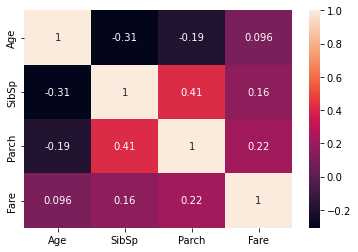

In [15]:
sns.heatmap(df[num_cols].corr(),annot=True)

In [16]:
from random import choice
p_list = ['Accent', 'Accent_r', 'Blues', 'Blues_r', 'BrBG', 'BrBG_r', 'BuGn', 'BuGn_r', 'BuPu', 'BuPu_r', 'CMRmap', 'CMRmap_r', 'Dark2', 'Dark2_r', 'GnBu', 'GnBu_r', 'Greens', 'Greens_r', 'Greys', 'Greys_r', 'OrRd', 'OrRd_r', 'Oranges', 'Oranges_r', 'PRGn', 'PRGn_r', 'Paired', 'Paired_r', 'Pastel1', 'Pastel1_r', 'Pastel2', 'Pastel2_r', 'PiYG', 'PiYG_r', 'PuBu', 'PuBuGn', 'PuBuGn_r', 'PuBu_r', 'PuOr', 'PuOr_r', 'PuRd', 'PuRd_r', 'Purples', 'Purples_r', 'RdBu', 'RdBu_r', 'RdGy', 'RdGy_r', 'RdPu', 'RdPu_r', 'RdYlBu', 'RdYlBu_r', 'RdYlGn', 'RdYlGn_r', 'Reds', 'Reds_r', 'Set1', 'Set1_r', 'Set2', 'Set2_r', 'Set3', 'Set3_r', 'Spectral', 'Spectral_r', 'Wistia', 'Wistia_r', 'YlGn', 'YlGnBu', 'YlGnBu_r', 'YlGn_r', 'YlOrBr', 'YlOrBr_r', 'YlOrRd', 'YlOrRd_r', 'afmhot', 'afmhot_r', 'autumn', 'autumn_r', 'binary', 'binary_r', 'bone', 'bone_r', 'brg', 'brg_r', 'bwr', 'bwr_r', 'cividis', 'cividis_r', 'cool', 'cool_r', 'coolwarm', 'coolwarm_r', 'copper', 'copper_r', 'crest', 'crest_r', 'cubehelix', 'cubehelix_r', 'flag', 'flag_r', 'flare', 'flare_r', 'gist_earth', 'gist_earth_r', 'gist_gray', 'gist_gray_r', 'gist_heat', 'gist_heat_r', 'gist_ncar', 'gist_ncar_r', 'gist_rainbow', 'gist_rainbow_r', 'gist_stern', 'gist_stern_r', 'gist_yarg', 'gist_yarg_r', 'gnuplot', 'gnuplot2', 'gnuplot2_r', 'gnuplot_r', 'gray', 'gray_r', 'hot', 'hot_r', 'hsv', 'hsv_r', 'icefire', 'icefire_r', 'inferno', 'inferno_r', 'jet', 'jet_r', 'magma', 'magma_r', 'mako', 'mako_r', 'nipy_spectral', 'nipy_spectral_r', 'ocean', 'ocean_r', 'pink', 'pink_r', 'plasma', 'plasma_r', 'prism', 'prism_r', 'rainbow', 'rainbow_r', 'rocket', 'rocket_r', 'seismic', 'seismic_r', 'spring', 'spring_r', 'summer', 'summer_r', 'tab10', 'tab10_r', 'tab20', 'tab20_r', 'tab20b', 'tab20b_r', 'tab20c', 'tab20c_r', 'terrain', 'terrain_r', 'turbo', 'turbo_r', 'twilight', 'twilight_r', 'twilight_shifted', 'twilight_shifted_r', 'viridis', 'viridis_r', 'vlag', 'vlag_r', 'winter', 'winter_r']

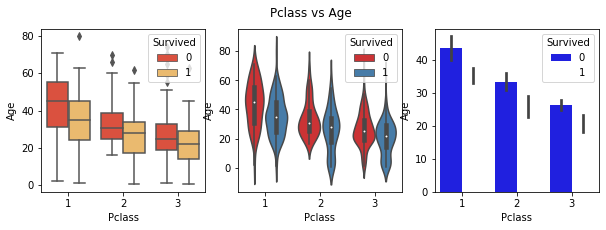

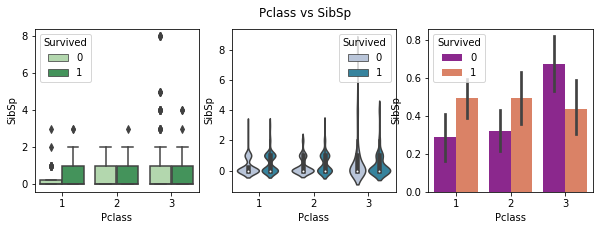

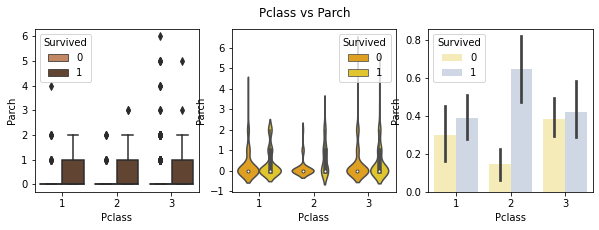

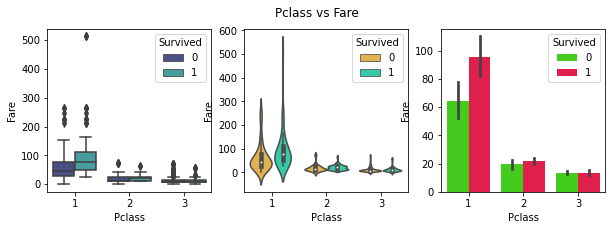

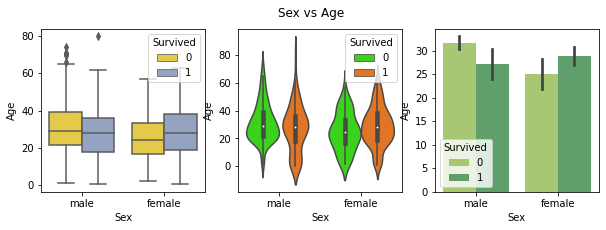

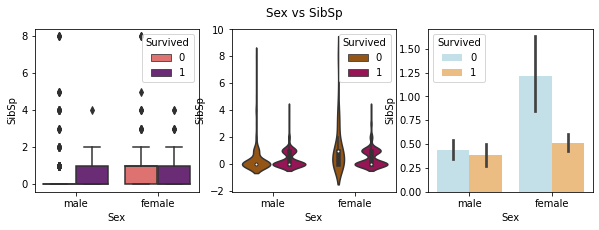

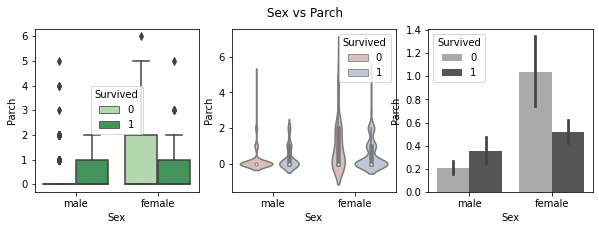

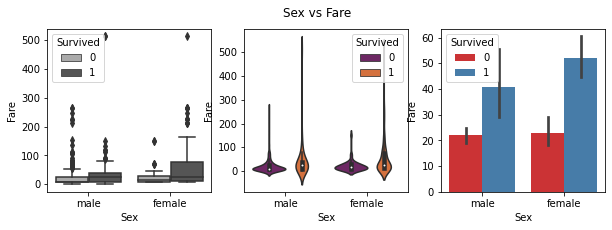

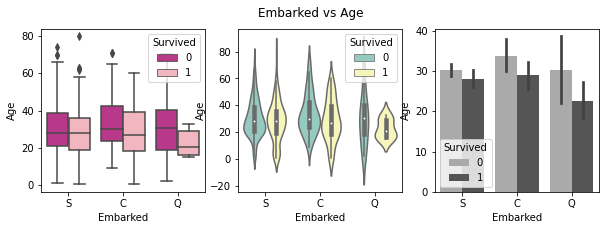

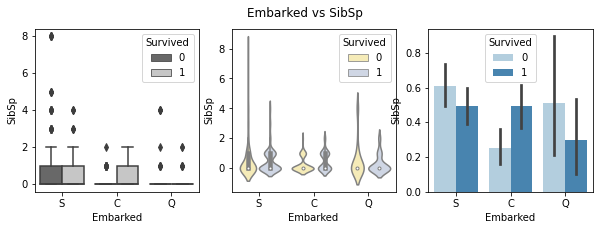

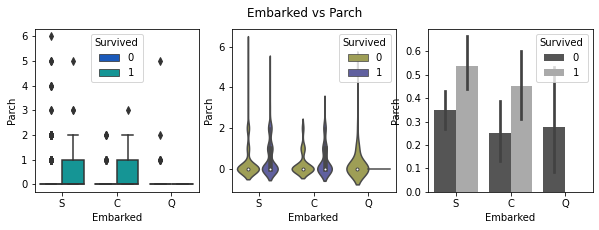

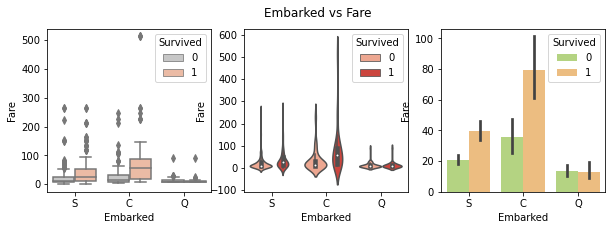

In [19]:
for col in cat_cols:
    if col == target_cols:
        continue
    for ncol in num_cols:
        plt.figure(figsize=(10,3))
        plt.suptitle(f'{col} vs {ncol}')
        plt.subplot(1,3,1)
        sns.boxplot(data = df,x = col, y = ncol,hue = target_cols, palette=choice(p_list))
        plt.subplot(1,3,2)
        sns.violinplot(data = df,x = col, y = ncol,hue = target_cols, palette=choice(p_list))
        plt.subplot(1,3,3)
        sns.barplot(data = df,x = col, y = ncol,hue = target_cols, palette=choice(p_list))
        plt.show()




In [20]:
df.drop(drop_cols,axis=1,inplace=True)

### Missing data identification

In [21]:
pd.isnull(df)

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,False,False,False,False,False,False,False,False,False,True,False
1,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,True,False
3,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...
886,False,False,False,False,False,False,False,False,False,True,False
887,False,False,False,False,False,False,False,False,False,False,False
888,False,False,False,False,True,False,False,False,False,True,False
889,False,False,False,False,False,False,False,False,False,False,False


In [ ]:
pd.isnull(df).sum()

Survived      0
Pclass        0
Name          0
Sex           0
Age         177
SibSp         0
Parch         0
Ticket        0
Fare          0
Cabin       687
Embarked      2
dtype: int64

In [22]:
100*pd.isnull(df).sum()/len(df)

Survived     0.000000
Pclass       0.000000
Name         0.000000
Sex          0.000000
Age         19.865320
SibSp        0.000000
Parch        0.000000
Ticket       0.000000
Fare         0.000000
Cabin       77.104377
Embarked     0.224467
dtype: float64

Missing Data Strategy
 -identify missing data
 -discard the columns having too much of missing data(>25%)
 -treat/imput the missing entries
     -try to fill fake entries which doesnot impact overall data
      -fill using mean values (numerical data)
       -fill using some imputers(catagorical data)
 -discard the two rows having missing entries,if the missing entries are too less(<5%)


<AxesSubplot:>

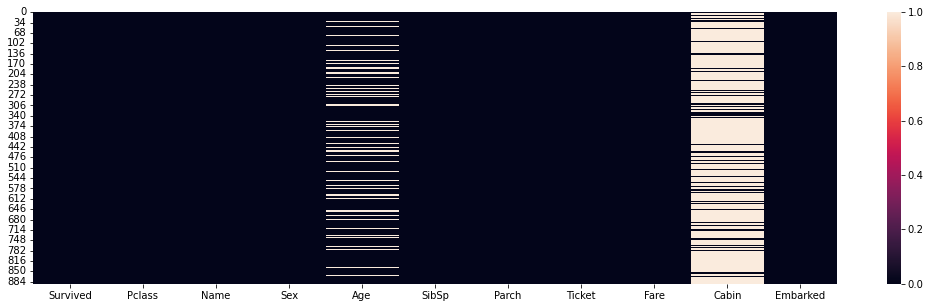

In [23]:
plt.figure(figsize=(18,5))
sns.heatmap(pd.isnull(df))

In [24]:
df.drop('Cabin', axis=1, inplace=True)

In [25]:
sns.set_style('whitegrid')

<AxesSubplot:xlabel='Survived', ylabel='Age'>

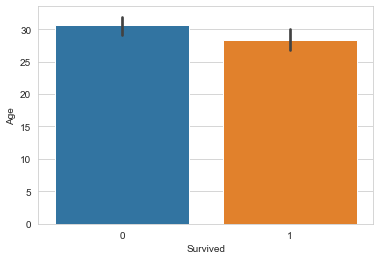

In [26]:
sns.barplot(data=df,x='Survived',y='Age')

In [27]:
df.describe()

,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [28]:
df['Age'].mean()

29.69911764705882

In [29]:
df['Age'].fillna(df['Age'].mean()).mean()

29.699117647058763

In [30]:
df['Age'].fillna(0)

0      22.0
1      38.0
2      26.0
3      35.0
4      35.0
       ... 
886    27.0
887    19.0
888     0.0
889    26.0
890    32.0
Name: Age, Length: 891, dtype: float64

<AxesSubplot:xlabel='Pclass', ylabel='Age'>

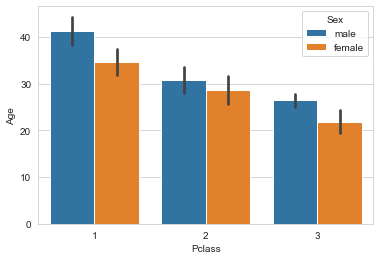

In [31]:
sns.barplot(data=df,y='Age',x='Pclass',hue='Sex')

In [32]:
df.head()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S
1,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C
2,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S
3,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S
4,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S


In [33]:
# Imput the fake entries in missing agr information
def age_imputer(data):
    age = data['Age']
    pclass = data['Pclass']
    sex = data['Sex']


    if pd.isnull(age):
        return df['Age'][(df['Pclass']==pclass & (df['Sex']==sex))].mean()
    else:
             return age

df['Age'] = df.apply(age_imputer,axis = 1)
             


<AxesSubplot:>

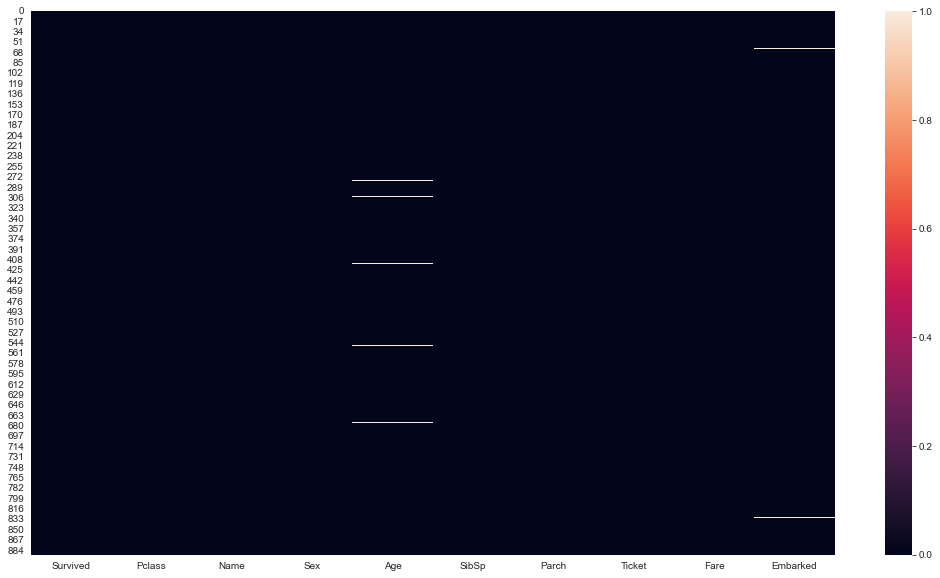

In [34]:
plt.figure(figsize=(18,10))
sns.heatmap(pd.isnull(df))

In [35]:
# Proping missing entries which were very less (in Embarked column)
df.dropna(inplace=True)

<AxesSubplot:>

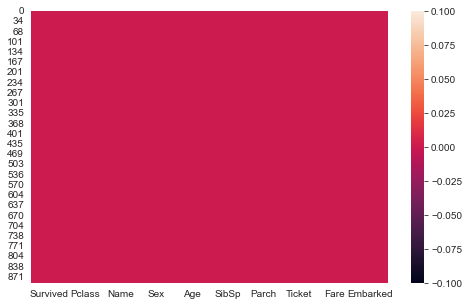

In [36]:
plt.figure(figsize=(8,5))
sns.heatmap(pd.isnull(df))

In [37]:
100*pd.isnull(df).sum()/len(df)

Survived    0.0
Pclass      0.0
Name        0.0
Sex         0.0
Age         0.0
SibSp       0.0
Parch       0.0
Ticket      0.0
Fare        0.0
Embarked    0.0
dtype: float64

In [38]:
df.head()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S
1,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C
2,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S
3,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S
4,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S


## string data preprocessing/creating dummy for string

In [39]:
pd.get_dummies(df)

,Survived,Pclass,Age,SibSp,Parch,Fare,"Name_Abbing, Mr. Anthony","Name_Abbott, Mr. Rossmore Edward","Name_Abbott, Mrs. Stanton (Rosa Hunt)","Name_Abelson, Mr. Samuel",...,Ticket_W./C. 14263,Ticket_W./C. 6607,Ticket_W./C. 6608,Ticket_W./C. 6609,Ticket_W.E.P. 5734,Ticket_W/C 14208,Ticket_WE/P 5735,Embarked_C,Embarked_Q,Embarked_S
0,0,3,22.000000,1,0,7.2500,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
1,1,1,38.000000,1,0,71.2833,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
2,1,3,26.000000,0,0,7.9250,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
3,1,1,35.000000,1,0,53.1000,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
4,0,3,35.000000,0,0,8.0500,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,0,2,27.000000,0,0,13.0000,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
887,1,1,19.000000,0,0,30.0000,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
888,0,3,34.611765,1,2,23.4500,0,0,0,0,...,0,1,0,0,0,0,0,0,0,1
889,1,1,26.000000,0,0,30.0000,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0


In [40]:
data = pd.get_dummies(df).drop('Sex_female',axis=1)

In [41]:
data.head(0)

,Survived,Pclass,Age,SibSp,Parch,Fare,"Name_Abbing, Mr. Anthony","Name_Abbott, Mr. Rossmore Edward","Name_Abbott, Mrs. Stanton (Rosa Hunt)","Name_Abelson, Mr. Samuel",...,Ticket_W./C. 14263,Ticket_W./C. 6607,Ticket_W./C. 6608,Ticket_W./C. 6609,Ticket_W.E.P. 5734,Ticket_W/C 14208,Ticket_WE/P 5735,Embarked_C,Embarked_Q,Embarked_S


In [42]:
target = data[target_cols]
features = data.drop(target_cols,axis=1)

In [43]:
target.head()

0    0
1    1
2    1
3    1
4    0
Name: Survived, dtype: int64

why we decided logistic regression
1. initially we thought of doing with pair plot,but since its a catagorical data in target,its not helpful
2. since its <b>binary catagorical targrt</b> and features are mixtures of numerical and catagorical both,then i can think of logistic regression (classification)

# Machine Learning Template

### Data spliting

In [44]:
from sklearn.model_selection import train_test_split
xtrain,xtest,ytrain,ytest = train_test_split(features,target,test_size=0.25,random_state=101)

Model Creation & Training

In [45]:
from sklearn.linear_model import LogisticRegression
model = LogisticRegression()
model.fit(xtrain,ytrain)

LogisticRegression()

Model Evaluation

In [46]:
print(round(100 * model.score(xtest,ytest)),'*')

82 *


In [ ]:
print(ytest.shape)
ytest.value_counts()

(220,)


0    135
1     85
Name: Survived, dtype: int64

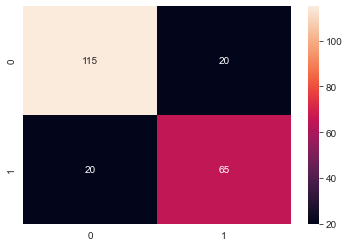

              precision    recall  f1-score   support

           0       0.85      0.85      0.85       135
           1       0.76      0.76      0.76        85

    accuracy                           0.82       220
   macro avg       0.81      0.81      0.81       220
weighted avg       0.82      0.82      0.82       220



In [47]:
# Confusion Matrix and Classification Report
from sklearn.metrics import confusion_matrix, classification_report
ytest_pred = model.predict(xtest)
sns.heatmap(confusion_matrix(ytest,ytest_pred), annot = True, fmt='d')
plt.show()

print(classification_report(ytest,ytest_pred))

In [48]:
pd.Series(ytest_pred).value_counts()

0    135
1     85
dtype: int64

# improving the model

1. by balancing the dataset
2. by hyperparameter tuning
3. cross validation

In [49]:
# putting class weights/hyperparam
model1 = LogisticRegression(class_weight = {0 :0.9,1:0.6},random_state=101)
model1.fit(xtrain,ytrain)

print(classification_report(ytest,model1.predict[xtest]))

# This method didnot work

TypeError: 'method' object is not subscriptable

In [ ]:
# Hyperparam
for algo in ['newton_cg','lbfgs','liblinear','sag','saga']:
model_algo = LogisticRegression(random_state=101,solver = algo,tol = 1,c=1)
model_algo.fit(xtrain,ytrain)

print(classification_report(ytest,model_algo.predict[xtest]))


In [ ]:
# this model is not really improving so we should not consider it as the score was low as compared to
# criticalness of the situation

# Decision Tree Algorithm

In [50]:
xtrain,xtest,ytrain,ytest

(     Pclass        Age  SibSp  Parch     Fare  Name_Abbing, Mr. Anthony  \
 339       1  45.000000      0      0  35.5000                         0   
 695       2  52.000000      0      0  13.5000                         0   
 636       3  32.000000      0      0   7.9250                         0   
 86        3  16.000000      1      3  34.3750                         0   
 25        3  38.000000      1      5  31.3875                         0   
 ..      ...        ...    ...    ...      ...                       ...   
 584       3  41.281386      0      0   8.7125                         0   
 851       3  74.000000      0      0   7.7750                         0   
 342       2  28.000000      0      0  13.0000                         0   
 531       3  41.281386      0      0   7.2292                         0   
 876       3  20.000000      0      0   9.8458                         0   
 
      Name_Abbott, Mr. Rossmore Edward  Name_Abbott, Mrs. Stanton (Rosa Hunt)  \
 339 

In [51]:
from sklearn.tree import DecisionTreeClassifier
  
model_dt = DecisionTreeClassifier().fit(xtrain,ytrain)
print(classification_report(ytest,model_dt.predict(xtest)))  

              precision    recall  f1-score   support

           0       0.85      0.82      0.84       135
           1       0.73      0.78      0.75        85

    accuracy                           0.80       220
   macro avg       0.79      0.80      0.80       220
weighted avg       0.81      0.80      0.81       220



In [52]:
pd.DataFrame(model_dt.feature_importances_,index = xtrain.columns,columns=['Importance']).\
    sort_values(by='Importance',ascending=False)

,Importance
Sex_male,0.281098
Age,0.115959
Fare,0.108131
Pclass,0.080052
SibSp,0.013199
...,...
"Name_Mitchell, Mr. Henry Michael",0.000000
"Name_Mionoff, Mr. Stoytcho",0.000000
"Name_Mineff, Mr. Ivan",0.000000
"Name_Minahan, Miss. Daisy E",0.000000


In [53]:
imp_cols = ['Sex_male','Fare','Age']

In [ ]:
model_dt2 = DecisionTreeClassifier().fit(xtrain[imp_cols],ytrain)
print(classification_report(ytest,model_dt2.predict(xtest))) 

ValueError: X has 1559 features, but DecisionTreeClassifier is expecting 3 features as input.

In [54]:
from sklearn.ensemble import RandomForestClassifier
  
model_rf = RandomForestClassifier().fit(xtrain,ytrain)
print(classification_report(ytest,model_rf.predict(xtest)))  


              precision    recall  f1-score   support

           0       0.85      0.92      0.88       135
           1       0.85      0.74      0.79        85

    accuracy                           0.85       220
   macro avg       0.85      0.83      0.84       220
weighted avg       0.85      0.85      0.85       220



In [55]:
pd.DataFrame(model_rf.feature_importances_,index = xtrain.columns,columns=['Importance']).\
    sort_values(by='Importance',ascending=False)

,Importance
Sex_male,0.145634
Fare,0.069190
Age,0.063133
Pclass,0.058079
SibSp,0.021440
...,...
"Name_Thorneycroft, Mrs. Percival (Florence Kate White)",0.000000
Ticket_113059,0.000000
Ticket_33638,0.000000
Ticket_335677,0.000000


In [56]:
model_rf = RandomForestClassifier().fit(xtrain,ytrain)
print(classification_report(ytest,model_rf.predict(xtest))) 

              precision    recall  f1-score   support

           0       0.85      0.92      0.88       135
           1       0.85      0.74      0.79        85

    accuracy                           0.85       220
   macro avg       0.85      0.83      0.84       220
weighted avg       0.85      0.85      0.85       220



after applying various algorithm.it observed that the best score is around 83% with logistic regression only
also random forst model can be used if we want less number of parameter

In [59]:
model_rf2 = RandomForestClassifier().fit(xtrain[imp_cols],ytrain)
print(classification_report(ytest,model_rf2.predict(xtest))) 

ValueError: X has 1559 features, but RandomForestClassifier is expecting 3 features as input.

In [57]:
pd.to_pickle(model_rf2,'SurvivalPredictionRF.pickle')
pd.to_pickle(model,'SurvivalPredictionLogisticR.pickle')


NameError: name 'model_rf2' is not defined

In [58]:
from paramiko import PasswordRequiredException
from sklearn.linear_model import LogisticRegressionCV

# Used Car price pridiction
#  tour package prediction yaatra